In [1]:
! pip install --upgrade --quiet category_encoders

     |████████████████████████████████| 82 kB 338 kB/s 


In [2]:
! pip install --upgrade --quiet pingouin

     |████████████████████████████████| 182 kB 5.4 MB/s 
     |████████████████████████████████| 38.1 MB 1.3 MB/s 
     |████████████████████████████████| 9.8 MB 21.2 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import pingouin as pg
import matplotlib.pyplot as plt
%matplotlib inline
color = sns.color_palette()

#import orginal file and learn about it


In [4]:
original_df= pd.read_excel('/content/drive/MyDrive/Capstone Project/Data Files/Bank Loan Default.xlsx')

In [5]:
original_df.shape


(119145, 41)

In [6]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119145 entries, 0 to 119144
Data columns (total 41 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   member_id                119145 non-null  int64         
 1   loan_amnt                119145 non-null  int64         
 2   funded_amnt              119145 non-null  int64         
 3   funded_amnt_inv          119145 non-null  float64       
 4   term                     119145 non-null  object        
 5   int_rate                 119145 non-null  float64       
 6   installment              119145 non-null  float64       
 7   grade                    119145 non-null  object        
 8   emp_length               115306 non-null  object        
 9   home_ownership           119145 non-null  object        
 10  annual_inc               119145 non-null  float64       
 11  verification_status      119145 non-null  object        
 12  issue_d         

In [7]:
original_df.describe().round(3)

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt
count,1.191450e+05,119145.000,119145.000,119145.000,119145.000,119145.000,119145.000,119145.000,119145.000,119145.000,49916.000,119145.000,119145.000,119053.000,119145.000,119145.000,119145.000,119145.000,119145.000,119145.000,119145.000,119145.000,119145.0,119145.0,119145.000
mean,4.288577e+06,12983.233,12915.291,12768.857,13.294,405.638,72715.248,15.748,0.215,0.837,35.357,10.560,15186.571,54.445,24.304,194.744,194.645,15038.650,14861.095,12716.429,2321.631,0.590,0.0,0.0,5859.336
std,3.466994e+06,7814.069,7773.290,7801.041,4.255,240.126,61416.416,7.556,0.654,1.048,21.628,4.597,17969.635,25.079,11.365,1541.731,1541.113,9413.865,9433.141,7706.592,2318.859,4.988,0.0,0.0,6494.646
min,7.069900e+04,500.000,500.000,0.000,5.420,15.690,4000.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.000,0.000,0.000,526.330,0.000,266.490,6.140,0.000,0.0,0.0,0.000
25%,1.240242e+06,7000.000,7000.000,6975.000,10.160,226.070,45000.000,10.070,0.000,0.000,17.000,7.000,5966.000,36.400,16.000,0.000,0.000,7941.790,7759.380,7000.000,844.330,0.000,0.0,0.0,569.250
50%,2.839634e+06,11300.000,11200.000,11000.000,13.110,357.030,62000.000,15.430,0.000,1.000,33.000,10.000,11135.000,56.400,23.000,0.000,0.000,12821.881,12665.170,11000.000,1624.120,0.000,0.0,0.0,3729.780
75%,7.277043e+06,18000.000,17625.000,17500.000,15.960,532.350,87000.000,21.110,0.000,1.000,50.000,13.000,19269.000,74.500,31.000,0.000,0.000,20209.642,20038.890,17000.000,2904.290,0.000,0.0,0.0,8801.030
max,1.209697e+07,35000.000,35000.000,35000.000,26.060,1407.010,7141778.000,34.990,29.000,8.000,141.000,52.000,1743266.000,122.500,99.000,27631.060,27631.060,57777.580,57777.580,35000.030,22777.580,286.748,0.0,0.0,36115.200


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


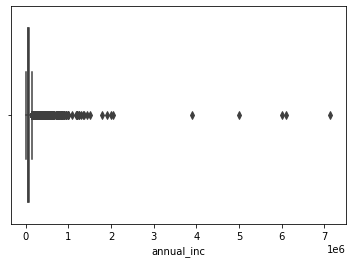

In [8]:
sns.boxplot(original_df['annual_inc'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


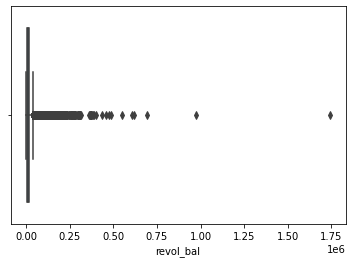

In [9]:
sns.boxplot(original_df['revol_bal'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


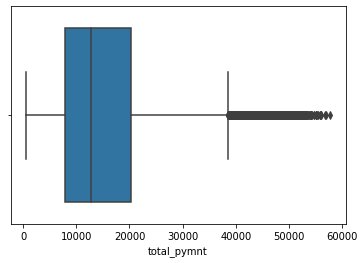

In [10]:
sns.boxplot(original_df['total_pymnt'])

#Main stats of categoric attributes:

In [11]:
original_df.describe(include=[np.object])

,term,grade,emp_length,home_ownership,verification_status,pymnt_plan,desc,purpose,addr_state,application_type,loan_status
count,119145,119145,115306,119145,119145,119145,61599,119145,119145,119145,119145
unique,2,7,11,5,3,2,61140,14,50,1,2
top,36 months,B,10+ years,MORTGAGE,Verified,n,,debt_consolidation,CA,INDIVIDUAL,Fully Paid
freq,98567,41450,34612,59846,48112,119141,185,67115,20891,119145,115862


#Check the Dependent variable statistics

In [12]:
loan=original_df.loan_status.value_counts()
loan

Fully Paid    115862
Default         3283
Name: loan_status, dtype: int64

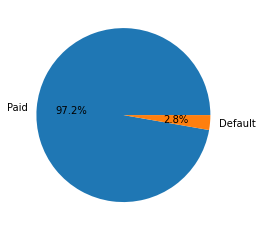

In [13]:
array=original_df.loan_status.value_counts()
tag =['Paid', 'Default']
plt.pie(array, labels=tag, autopct='%1.1f%%')
plt.show()

#Type of variables

In [14]:
original_df.dtypes.sort_values(ascending=True)

member_id                           int64
last_credit_pull_d         datetime64[ns]
next_pymnt_d               datetime64[ns]
last_pymnt_d               datetime64[ns]
collection_recovery_fee             int64
recoveries                          int64
total_acc                           int64
revol_bal                           int64
open_acc                            int64
earliest_cr_line           datetime64[ns]
delinq_2yrs                         int64
issue_d                    datetime64[ns]
inq_last_6mths                      int64
loan_amnt                           int64
funded_amnt                         int64
out_prncp                         float64
total_pymnt                       float64
out_prncp_inv                     float64
total_rec_int                     float64
installment                       float64
revol_util                        float64
total_rec_late_fee                float64
mths_since_last_delinq            float64
total_pymnt_inv                   

#Couting variables by type

In [15]:
original_df.dtypes.value_counts()

float64           15
object            11
int64             10
datetime64[ns]     5
dtype: int64

In [16]:
nulval = original_df.isnull().sum().to_frame().rename(columns={0:"absolute"})
nulval["percent"] = (nulval.apply(lambda x: x/x.sum())*100).round(2)
nulval

,absolute,percent
member_id,0,0.00
loan_amnt,0,0.00
funded_amnt,0,0.00
funded_amnt_inv,0,0.00
term,0,0.00
int_rate,0,0.00
installment,0,0.00
grade,0,0.00
emp_length,3839,1.56
home_ownership,0,0.00


#Checking for missing values

In [17]:
naval=original_df.isna().sum().to_frame().rename(columns={0:"absolute"})
naval["percent"] = (naval.apply(lambda x: x/x.sum())*100).round(2)
naval

,absolute,percent
member_id,0,0.00
loan_amnt,0,0.00
funded_amnt,0,0.00
funded_amnt_inv,0,0.00
term,0,0.00
int_rate,0,0.00
installment,0,0.00
grade,0,0.00
emp_length,3839,1.56
home_ownership,0,0.00


#Cleaning of the Dataset is required.
a) member_id is removed as it wont effect prediction model
b) emp_length Converted the data to numericals instead of string. Removed words like Years and + , also replaced n/a with 0
c) desc This is separated to do text analysis
d) recoveries and collection_recovery_fee  removed as they had only zeroes 
e) next_pymnt_d Removed as 115862 elements are blank 
f) mths_since_last_delinq Blanks will be replaced by '0' loan status is fully paid, rest 1400+ rows will be removed. 
g) application_type Removed since all elements are 'individual'


#read clean dataset

In [18]:
clean_df= pd.read_csv('/content/drive/MyDrive/Capstone Project/Data Files/Bank Loan Default_CleanBaseLine_v2.0.csv')
clean_df.shape
clean_df.info()
clean_df['issue_d']= pd.to_datetime(clean_df['issue_d'], format='%b-%y')
clean_df['earliest_cr_line']= pd.to_datetime(clean_df['earliest_cr_line'], format='%b-%y')
clean_df['last_pymnt_d']= pd.to_datetime(clean_df['last_pymnt_d'], format='%b-%y')
clean_df['last_credit_pull_d']= pd.to_datetime(clean_df['last_credit_pull_d'], format='%b-%y')
clean_df.info()
clean_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119145 entries, 0 to 119144
Data columns (total 36 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   member_id               119145 non-null  int64  
 1   loan_amnt               119145 non-null  int64  
 2   funded_amnt             119145 non-null  int64  
 3   funded_amnt_inv         119145 non-null  float64
 4   term                    119145 non-null  object 
 5   int_rate                119145 non-null  float64
 6   installment             119145 non-null  float64
 7   grade                   119145 non-null  object 
 8   emp_length              119145 non-null  int64  
 9   home_ownership          119145 non-null  object 
 10  annual_inc              119145 non-null  float64
 11  verification_status     119145 non-null  object 
 12  issue_d                 119145 non-null  object 
 13  pymnt_plan              119145 non-null  object 
 14  purpose             

member_id                 0
loan_amnt                 0
funded_amnt               0
funded_amnt_inv           0
term                      0
int_rate                  0
installment               0
grade                     0
emp_length                0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
pymnt_plan                0
purpose                   0
addr_state                0
dti                       0
delinq_2yrs               0
earliest_cr_line          0
inq_last_6mths            0
mths_since_last_delinq    0
open_acc                  0
revol_bal                 0
revol_util                0
total_acc                 0
out_prncp                 0
out_prncp_inv             0
total_pymnt               0
total_pymnt_inv           0
total_rec_prncp           0
total_rec_int             0
total_rec_late_fee        0
last_pymnt_d              0
last_pymnt_amnt           0
last_credit_pull_d        8
loan_status         

#Drop Missing elements rows

In [19]:
clean_df=clean_df.dropna()
clean_df.info()
clean_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119137 entries, 0 to 119144
Data columns (total 36 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   member_id               119137 non-null  int64         
 1   loan_amnt               119137 non-null  int64         
 2   funded_amnt             119137 non-null  int64         
 3   funded_amnt_inv         119137 non-null  float64       
 4   term                    119137 non-null  object        
 5   int_rate                119137 non-null  float64       
 6   installment             119137 non-null  float64       
 7   grade                   119137 non-null  object        
 8   emp_length              119137 non-null  int64         
 9   home_ownership          119137 non-null  object        
 10  annual_inc              119137 non-null  float64       
 11  verification_status     119137 non-null  object        
 12  issue_d                 119137

member_id                 0
loan_amnt                 0
funded_amnt               0
funded_amnt_inv           0
term                      0
int_rate                  0
installment               0
grade                     0
emp_length                0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
pymnt_plan                0
purpose                   0
addr_state                0
dti                       0
delinq_2yrs               0
earliest_cr_line          0
inq_last_6mths            0
mths_since_last_delinq    0
open_acc                  0
revol_bal                 0
revol_util                0
total_acc                 0
out_prncp                 0
out_prncp_inv             0
total_pymnt               0
total_pymnt_inv           0
total_rec_prncp           0
total_rec_int             0
total_rec_late_fee        0
last_pymnt_d              0
last_pymnt_amnt           0
last_credit_pull_d        0
loan_status         

In [20]:
clean_df.describe(include=[np.object])

,term,grade,home_ownership,verification_status,pymnt_plan,purpose,addr_state,loan_status
count,119137,119137,119137,119137,119137,119137,119137,119137
unique,2,7,5,3,2,14,50,2
top,36 months,B,MORTGAGE,Verified,n,debt_consolidation,CA,Fully Paid
freq,98560,41448,59839,48110,119133,67110,20889,115854


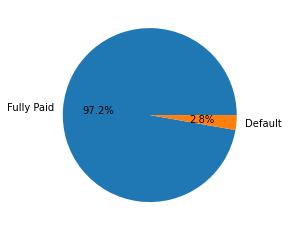

In [21]:
array=clean_df.loan_status.value_counts()
tag =['Fully Paid', 'Default']
plt.pie(array, labels=tag, autopct='%1.1f%%')
plt.show()

#Univariate Numeraical types

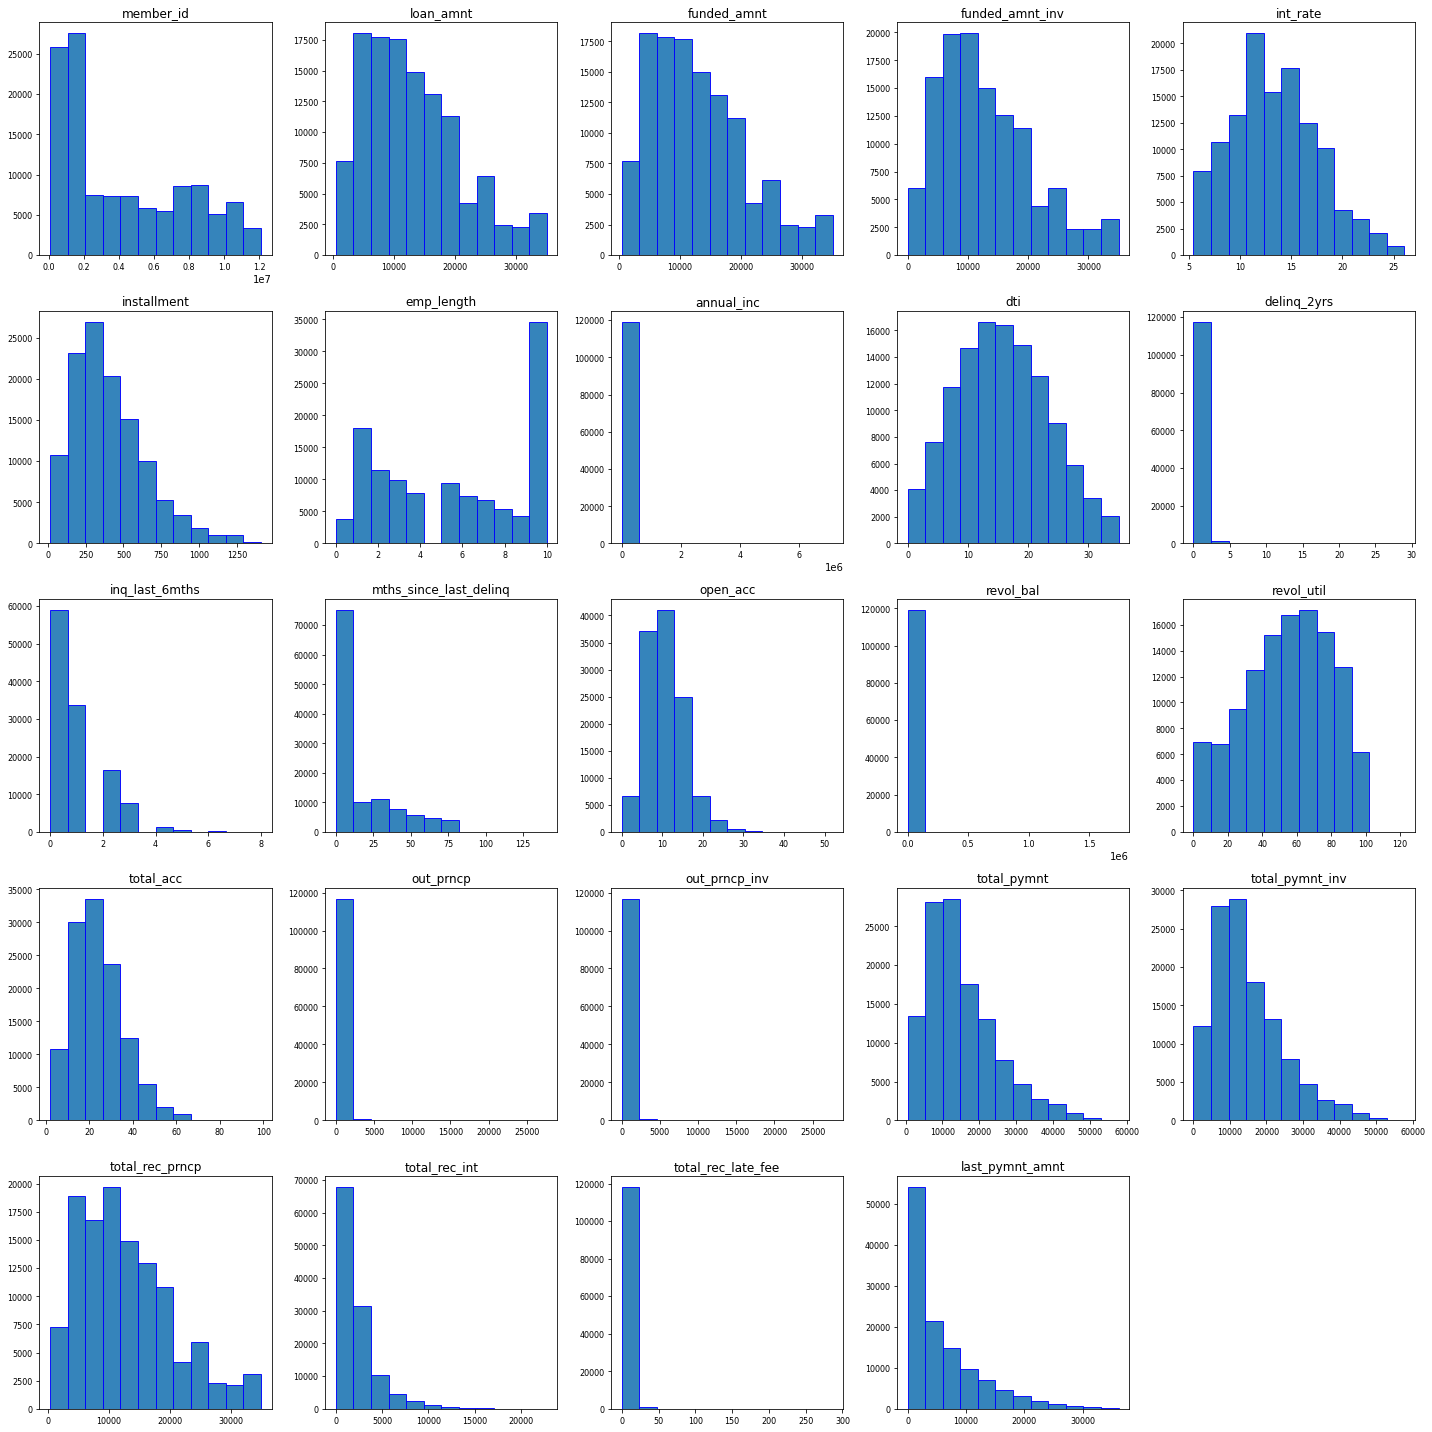

In [22]:
clean_df.hist(figsize=(20,20), bins=12, ec="b", xlabelsize=8, ylabelsize=8, alpha=0.9, grid=False)
plt.tight_layout()
plt.show()

#Visualize Categorical Data elements

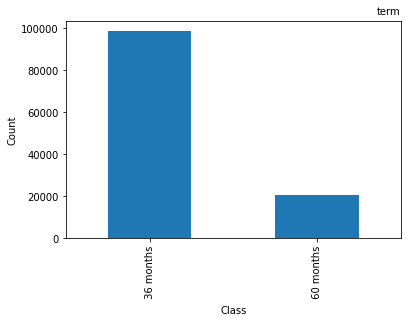

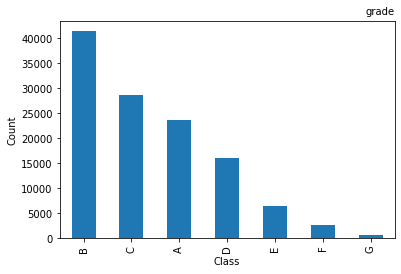

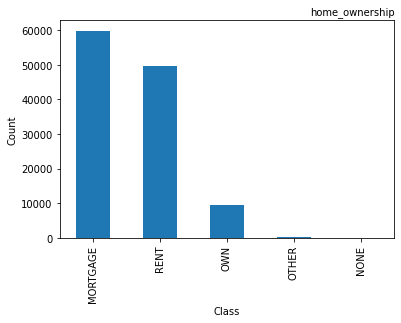

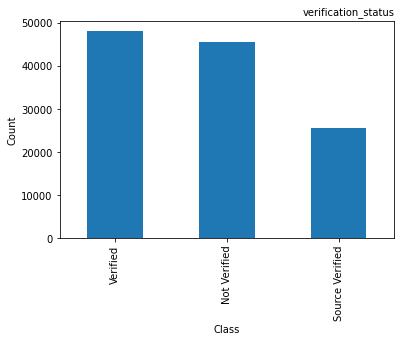

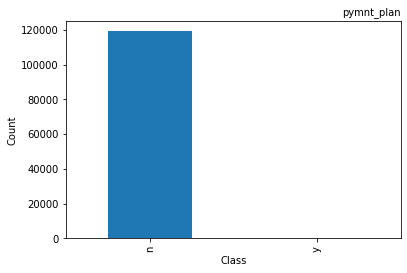

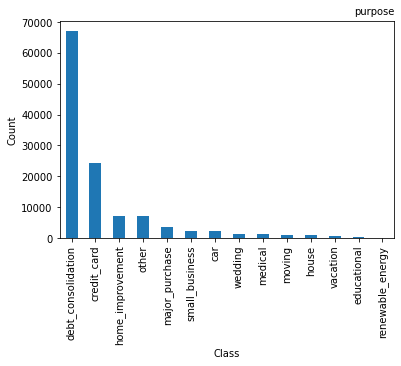

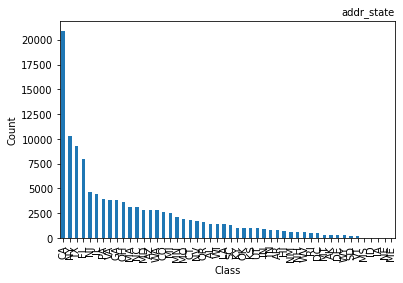

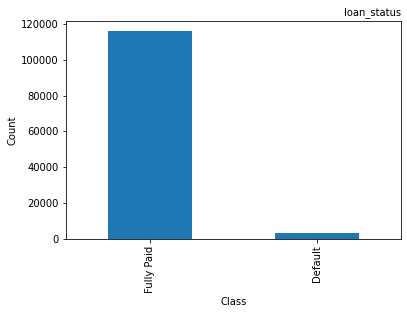

In [23]:
##plt.rcParams['figure.figsize'] = [10, 10]
for col in clean_df.select_dtypes(include=["object"]).columns:
    clean_df[col].value_counts().plot(kind="bar")
    
    plt.xlabel("Class", fontsize=10)
    plt.xticks(rotation=90, horizontalalignment="center")
    plt.ylabel("Count", fontsize=10)
    plt.title(col, fontsize=10, loc="right")
    plt.show()

#Box Plot

In [24]:
# Boxplot + Hist chart
def boxhist(x):
    variable = clean_df[x]
    np.array(variable).mean()
    np.median(variable)
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.5, 2)})
    mean=np.array(variable).mean()
    median=np.median(variable)
    sns.boxplot(variable, ax=ax_box)
    ax_box.axvline(mean, color='r', linestyle='--')
    ax_box.axvline(median, color='g', linestyle='-')
    sns.distplot(variable, ax=ax_hist)
    ax_hist.axvline(mean, color='r', linestyle='--')
    ax_hist.axvline(median, color='g', linestyle='-')
    plt.title(x, fontsize=12, loc="center")
    plt.legend({'Mean':mean,'Median':median})
    ax_box.set(xlabel='')
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


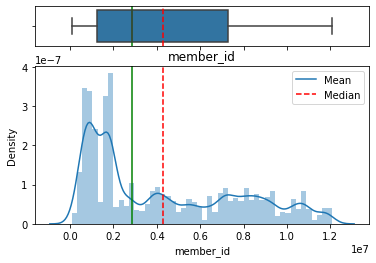

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


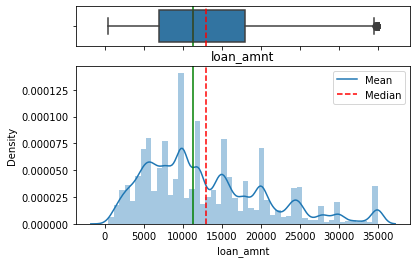

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


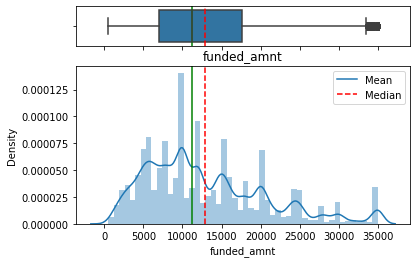

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


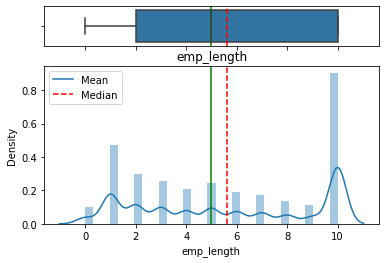

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


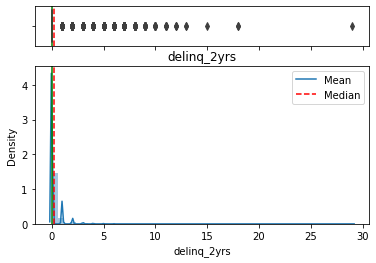

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


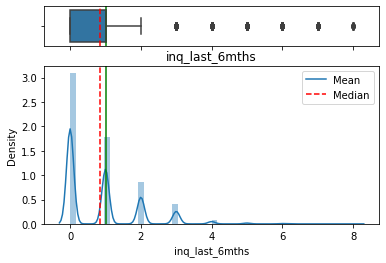

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


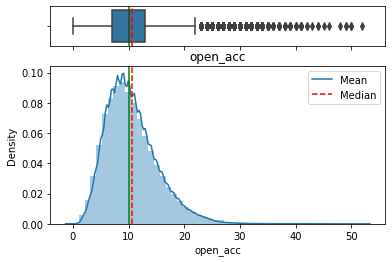

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


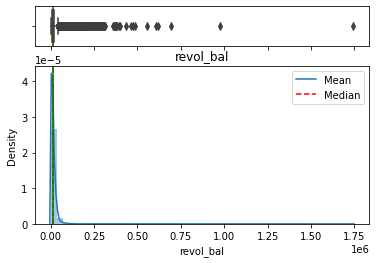

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


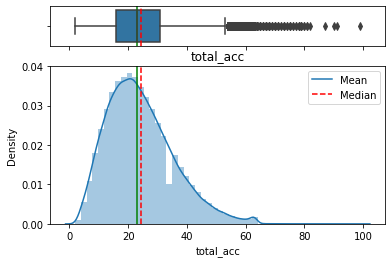

In [25]:
for col in clean_df.select_dtypes(include=["int64"]).columns :
    boxhist(col)

In [26]:
# Pivot_table_mean
def pivot_mean(a, b, c):
    type_pivot_mean = clean_df.pivot_table(
        columns=a,
        index=b,
        values=c, aggfunc=np.mean)
    display(type_pivot_mean)
# Display pivot_table
    type_pivot_mean.sort_values(by=[b], ascending=True).plot(kind="bar", title=(b), figsize=(15,5),fontsize = 12);
# Pivot_table_sum
def pivot_sum(a, b, c):
    type_pivot_sum = clean_df.pivot_table(
        columns=a,
        index=b,
        values=c, aggfunc=np.sum)
    display(type_pivot_sum)
# Display pivot_table
    type_pivot_sum.sort_values(by=[b], ascending=True).plot(kind="bar", title=(b), figsize=(15,5),fontsize = 12);

home_ownership,MORTGAGE,NONE,OTHER,OWN,RENT
grade,,,,,
A,5.244838e+10,12769658.0,11250138.0,6.233291e+09,2.189818e+10
B,9.815051e+10,21078490.0,36854004.0,1.399825e+10,6.578735e+10
C,6.779703e+10,23312277.0,46317107.0,1.114650e+10,5.459856e+10
D,3.201606e+10,18029207.0,11599145.0,6.632133e+09,3.465819e+10
E,1.420251e+10,NaN,2019376.0,2.392805e+09,1.280415e+10
F,6.151868e+09,7520541.0,2564933.0,1.197613e+09,5.805960e+09
G,1.240289e+09,2506830.0,NaN,2.623662e+08,1.273977e+09


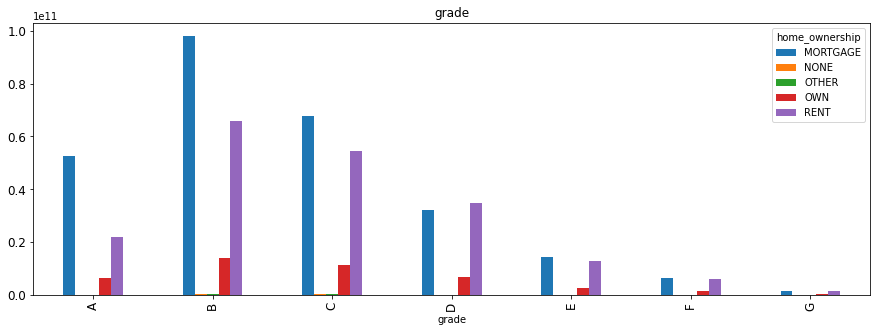

In [27]:
pivot_sum("home_ownership","grade","member_id")

#Create Permutations of combinations of categorical variables

term,36 months,60 months
loan_status,,
Default,15236432186,8180896202
Fully Paid,397533826149,89940633243


grade,A,B,C,D,E,F,G
loan_status,,,,,,,
Default,1087431447,5982547068,7217560654,4819590219,2710734281,1274276384,325188335
Fully Paid,79516438436,172011491841,126394157566,68516423932,26690746064,11891250329,2453951224


home_ownership,MORTGAGE,NONE,OTHER,OWN,RENT
loan_status,,,,,
Default,1.082086e+10,NaN,NaN,2.231139e+09,1.036533e+10
Fully Paid,2.611858e+11,85217003.0,110604703.0,3.963183e+10,1.864610e+11


verification_status,Not Verified,Source Verified,Verified
loan_status,,,
Default,6030210450,5732774550,11654343388
Fully Paid,160772168273,111740205424,214962085695


pymnt_plan,n,y
loan_status,,
Default,23414924738,2403650
Fully Paid,487472983696,1475696


purpose,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
loan_status,,,,,,,,,,,,,,
Default,8.052746e+07,4.819681e+09,1.471256e+10,NaN,1.327270e+09,6.873263e+07,3.087803e+08,1.813907e+08,8.809338e+07,1.327496e+09,NaN,3.516121e+08,9.508553e+07,5.610403e+07
Fully Paid,5.138854e+09,1.119001e+11,2.903528e+11,134317572.0,2.698473e+10,2.919675e+09,9.769813e+09,3.925937e+09,2.784465e+09,2.225307e+10,342303188.0,5.606685e+09,2.375371e+09,2.986376e+09


addr_state,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
loan_status,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Default,3.595920e+07,2.881699e+08,2.106945e+08,5.304003e+08,3.485326e+09,3.232643e+08,3.920773e+08,6.260217e+07,7.169552e+07,1.547114e+09,7.415560e+08,2.129889e+08,NaN,NaN,8.964203e+08,3.511507e+08,1.807928e+08,1.630606e+08,2.855144e+08,4.745999e+08,6.292488e+08,NaN,6.044268e+08,4.159776e+08,3.498465e+08,NaN,5.840734e+07,7.246340e+08,2434587.0,8.927401e+07,9.631450e+08,1.057914e+08,3.730022e+08,2.306669e+09,7.773269e+08,3.536673e+08,2.540988e+08,7.872233e+08,7.565953e+07,2.024127e+08,8.872595e+07,4.500096e+08,1.735863e+09,1.601163e+08,8.435972e+08,9032741.0,4.197262e+08,2.276222e+08,1.133313e+08,4.267060e+07
Fully Paid,1.451803e+09,5.567030e+09,3.394811e+09,1.182375e+10,8.523977e+10,1.164781e+10,7.041573e+09,1.539593e+09,1.161793e+09,3.168739e+10,1.548492e+10,3.082979e+09,1641940.0,1481705.0,1.768618e+10,6.533268e+09,4.255825e+09,4.499073e+09,5.571404e+09,1.111331e+10,1.117578e+10,360257.0,1.093124e+10,8.709923e+09,7.499927e+09,15793012.0,1.559085e+09,1.370564e+10,10869659.0,2.448518e+09,1.775501e+10,2.687536e+09,7.107415e+09,3.905601e+10,1.483622e+10,4.249961e+09,7.032770e+09,1.569655e+10,2.014924e+09,5.210509e+09,1.010194e+09,5.926902e+09,3.806992e+10,4.488979e+09,1.515574e+10,627392923.0,1.221920e+10,5.923830e+09,2.372885e+09,1.189964e+09


loan_status,Default,Fully Paid
loan_status,,
Default,2.341733e+10,NaN
Fully Paid,NaN,4.874745e+11


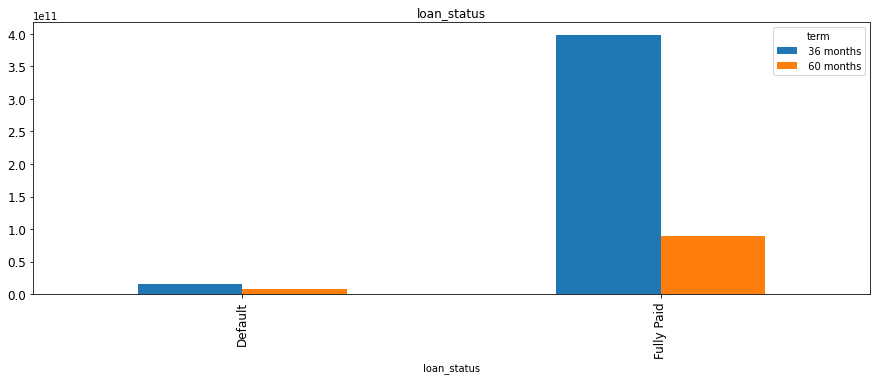

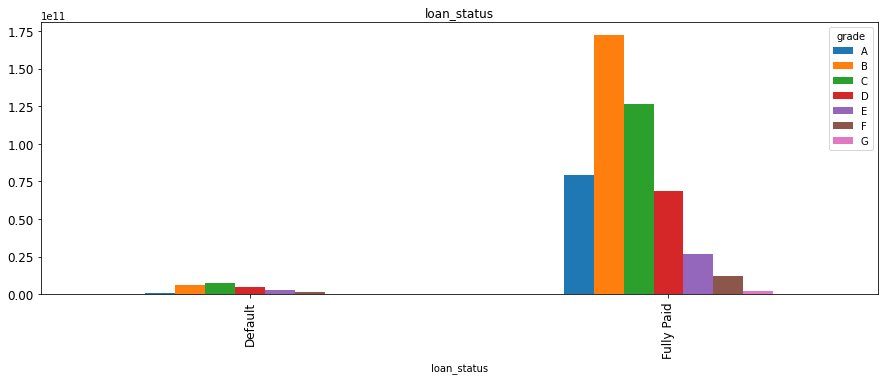

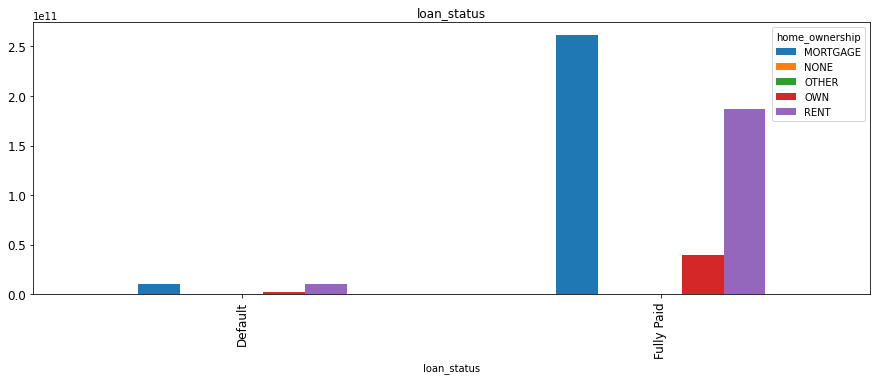

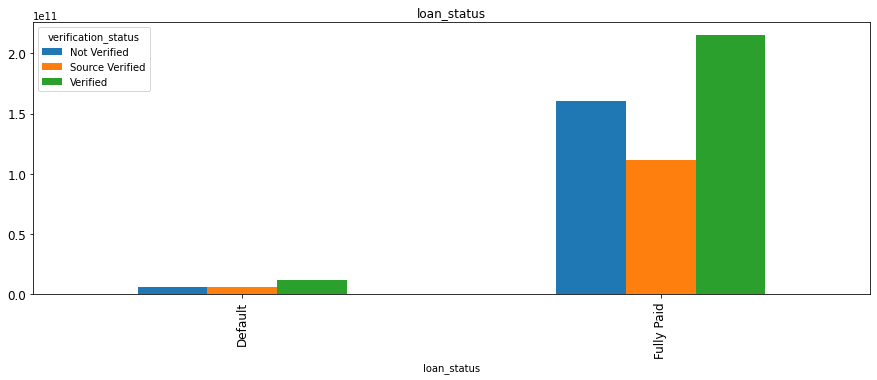

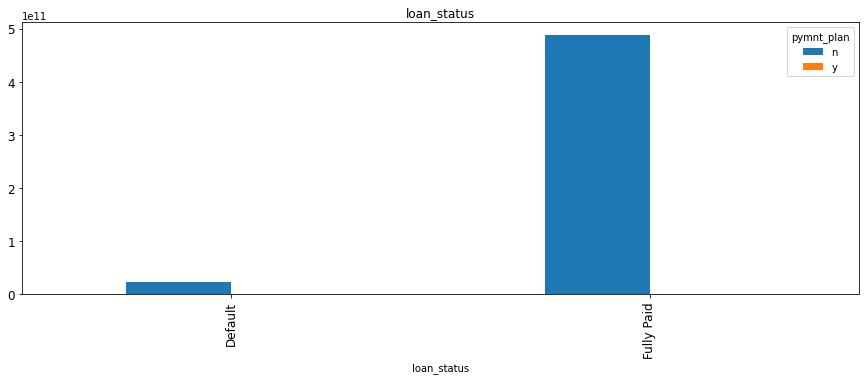

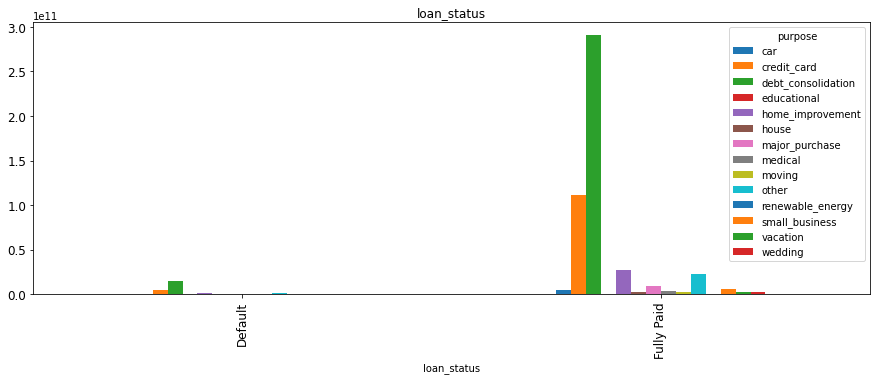

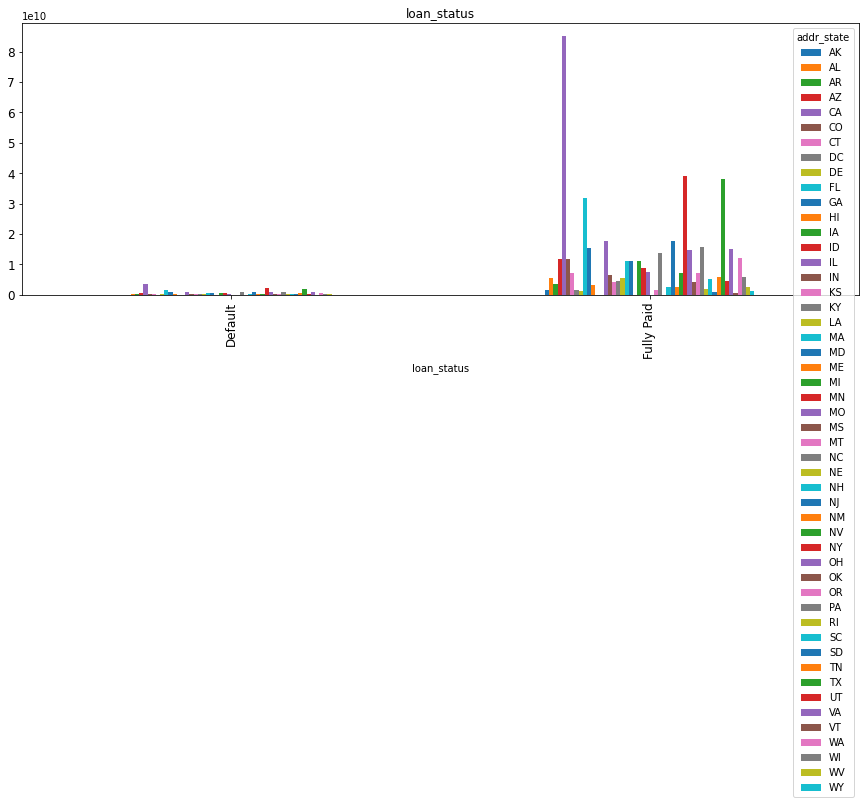

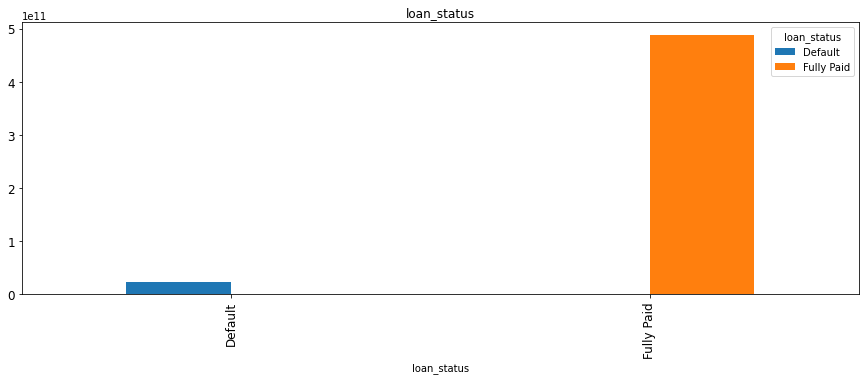

In [28]:
plt.rcParams['figure.figsize'] = [15, 5]
for col in clean_df.select_dtypes(include=["object"]).columns:
    pivot_sum(clean_df[col],"loan_status","member_id")
   

term,36 months,60 months
loan_status,,
Default,7.454223e+06,6.602822e+06
Fully Paid,4.118839e+06,4.650979e+06


grade,A,B,C,D,E,F,G
loan_status,,,,,,,
Default,7.397493e+06,7.207888e+06,7.290465e+06,7.098071e+06,6.759936e+06,6.636856e+06,7.390644e+06
Fully Paid,3.400463e+06,4.234859e+06,4.560167e+06,4.487583e+06,4.506288e+06,4.934129e+06,4.595414e+06


home_ownership,MORTGAGE,NONE,OTHER,OWN,RENT
loan_status,,,,,
Default,6.923132e+06,NaN,NaN,7.462004e+06,7.294394e+06
Fully Paid,4.481876e+06,2.367139e+06,970216.692982,4.341311e+06,3.860557e+06


verification_status,Not Verified,Source Verified,Verified
loan_status,,,
Default,7.327109e+06,7.664137e+06,6.807444e+06
Fully Paid,3.597176e+06,4.512568e+06,4.633003e+06


pymnt_plan,n,y
loan_status,,
Default,7.136521e+06,1201825.0
Fully Paid,4.207722e+06,737848.0


purpose,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
loan_status,,,,,,,,,,,,,,
Default,6.710622e+06,7.302547e+06,7.152433e+06,NaN,6.570641e+06,5.287126e+06,7.017733e+06,7.886554e+06,6.292384e+06,7.214652e+06,NaN,6.634190e+06,8.644139e+06,5.610403e+06
Fully Paid,2.369227e+06,4.761503e+06,4.463327e+06,499321.828996,3.869888e+06,3.582423e+06,2.767652e+06,3.128237e+06,2.949645e+06,3.258613e+06,2.427682e+06,2.510831e+06,3.280899e+06,2.106048e+06


addr_state,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
loan_status,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Default,5.993201e+06,6.549316e+06,7.023150e+06,7.366671e+06,7.230967e+06,7.027485e+06,7.128678e+06,7.825272e+06,8.961941e+06,7.064449e+06,7.199572e+06,8.191880e+06,NaN,NaN,6.842903e+06,7.803350e+06,7.533035e+06,8.153032e+06,6.797963e+06,6.684505e+06,7.232745e+06,NaN,7.555335e+06,7.563229e+06,8.329679e+06,NaN,7.300917e+06,7.174594e+06,2.434587e+06,7.439501e+06,6.879607e+06,6.611962e+06,6.781857e+06,7.011152e+06,7.264738e+06,7.217700e+06,6.867535e+06,7.092102e+06,6.878139e+06,6.325397e+06,8.065995e+06,8.333512e+06,6.999449e+06,8.005814e+06,6.803204e+06,2.258185e+06,6.558222e+06,6.694770e+06,8.095096e+06,8.534119e+06
Fully Paid,4.399404e+06,4.105479e+06,4.264838e+06,4.321547e+06,4.176987e+06,4.500700e+06,3.883934e+06,3.376300e+06,4.076467e+06,4.079746e+06,4.150341e+06,4.587766e+06,328388.0,296341.0,4.083624e+06,7.275354e+06,4.307515e+06,4.410856e+06,4.192177e+06,3.655695e+06,4.095193e+06,120085.666667,4.432784e+06,4.288490e+06,4.056207e+06,877389.555556,4.585543e+06,4.560945e+06,3.623220e+06,4.435721e+06,3.937682e+06,4.427572e+06,4.352367e+06,3.914212e+06,4.191023e+06,4.404104e+06,4.508186e+06,4.057004e+06,3.837950e+06,4.032902e+06,4.174354e+06,7.647616e+06,4.219208e+06,4.730220e+06,4.068654e+06,3.585102e+06,4.453062e+06,4.339803e+06,4.337997e+06,4.219730e+06


loan_status,Default,Fully Paid
loan_status,,
Default,7.132905e+06,NaN
Fully Paid,NaN,4.207662e+06


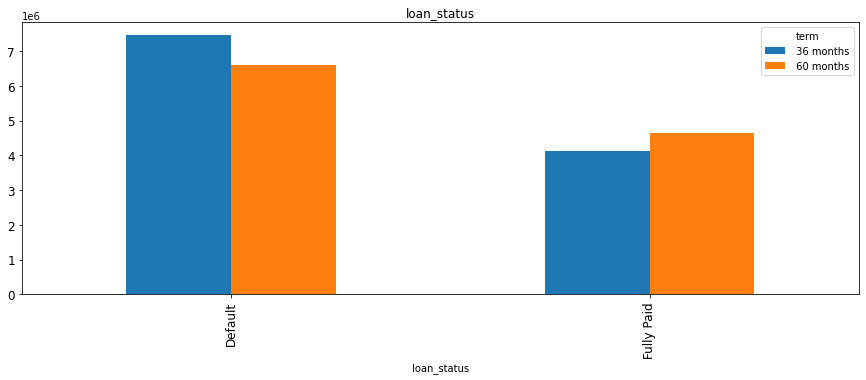

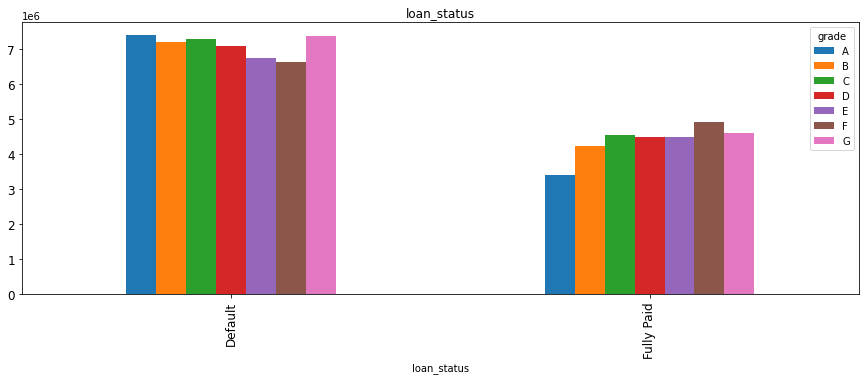

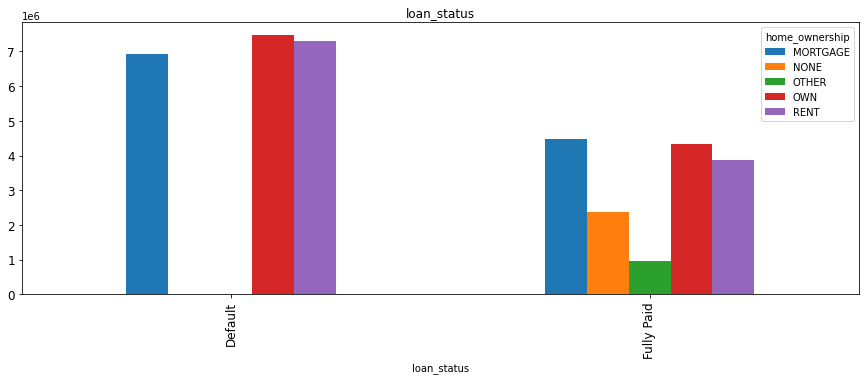

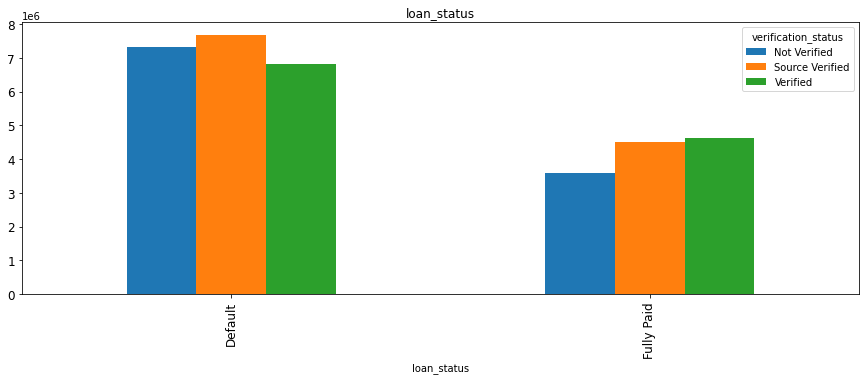

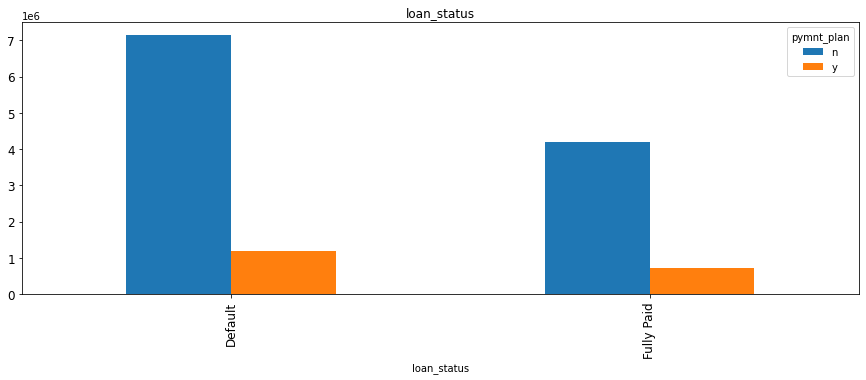

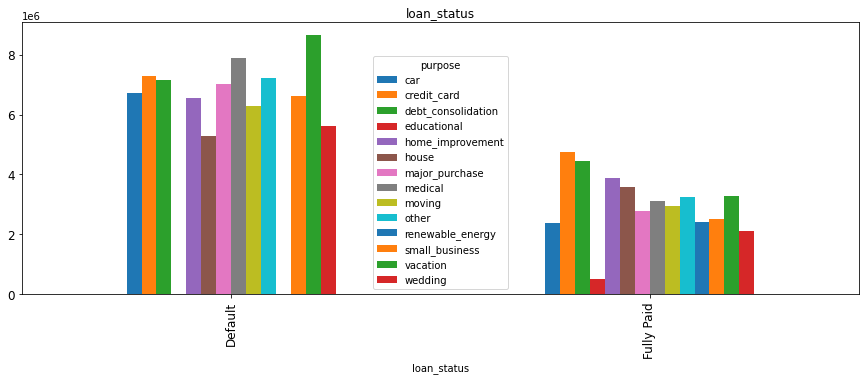

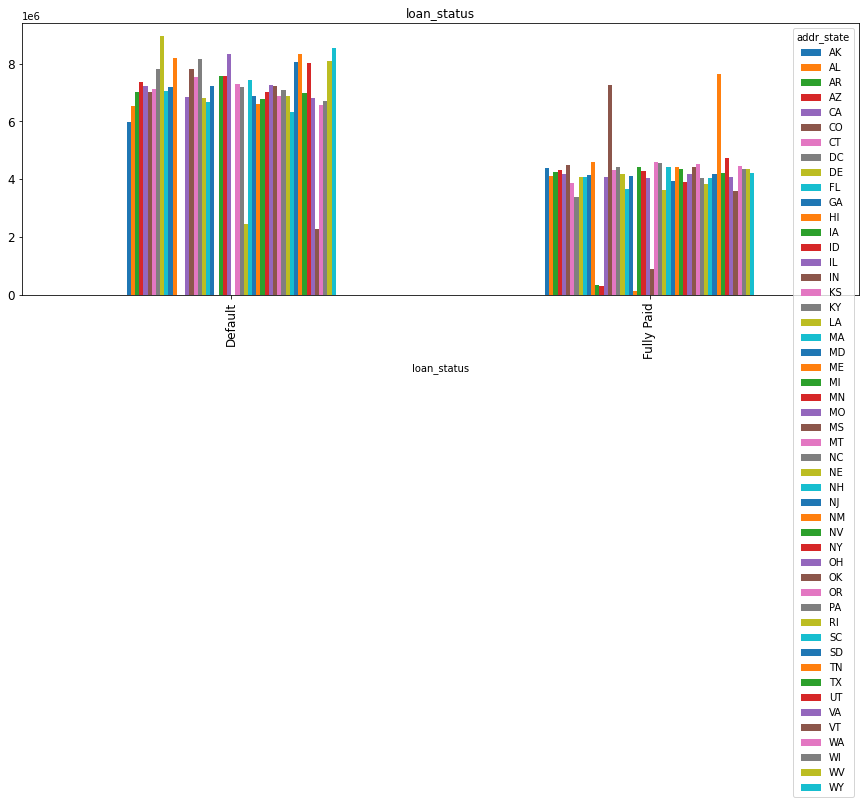

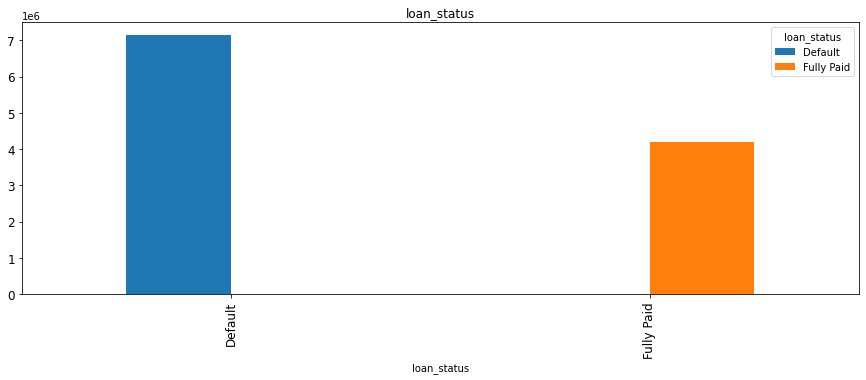

In [29]:
plt.rcParams['figure.figsize'] = [15, 5]
for col in clean_df.select_dtypes(include=["object"]).columns:
    pivot_mean(clean_df[col],"loan_status","member_id")

#Numeric Variables vs Dependent variable

In [30]:
#tag =['Fully Paid', 'Default']
def target(x):
    short_0 = clean_df[clean_df.loan_status == 'Fully Paid'].loc[:,x]
    short_1 = clean_df[clean_df.loan_status == 'Default'].loc[:,x]
    
    a = np.array(short_0)
    b = np.array(short_1)
    
    np.warnings.filterwarnings('ignore')
    
    plt.hist(a, bins=40, density=True, color="g", alpha = 0.6, label='Fully Paid', align="left")
    plt.hist(b, bins=40, density=True, color="r", alpha = 0.6, label='Default', align="right")
    plt.legend(loc='best')
    plt.title(x, fontsize=12, loc="center")
    plt.xlabel('Relative frequency')
    plt.ylabel('Absolute frequency')
    plt.show()

In [31]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119137 entries, 0 to 119144
Data columns (total 36 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   member_id               119137 non-null  int64         
 1   loan_amnt               119137 non-null  int64         
 2   funded_amnt             119137 non-null  int64         
 3   funded_amnt_inv         119137 non-null  float64       
 4   term                    119137 non-null  object        
 5   int_rate                119137 non-null  float64       
 6   installment             119137 non-null  float64       
 7   grade                   119137 non-null  object        
 8   emp_length              119137 non-null  int64         
 9   home_ownership          119137 non-null  object        
 10  annual_inc              119137 non-null  float64       
 11  verification_status     119137 non-null  object        
 12  issue_d                 119137

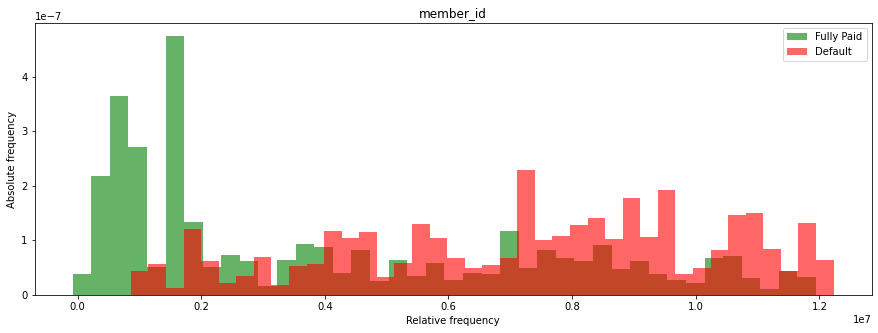

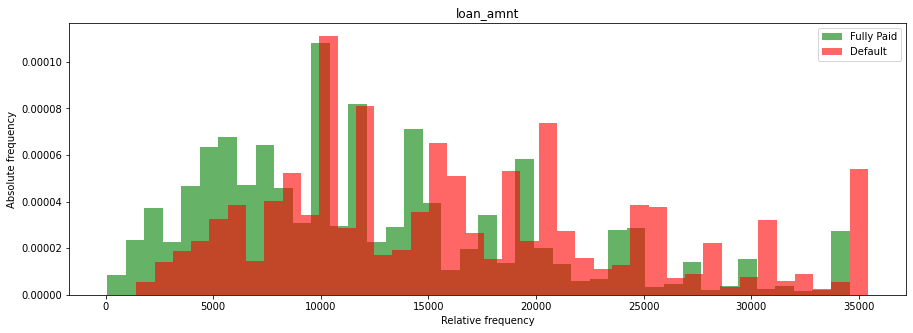

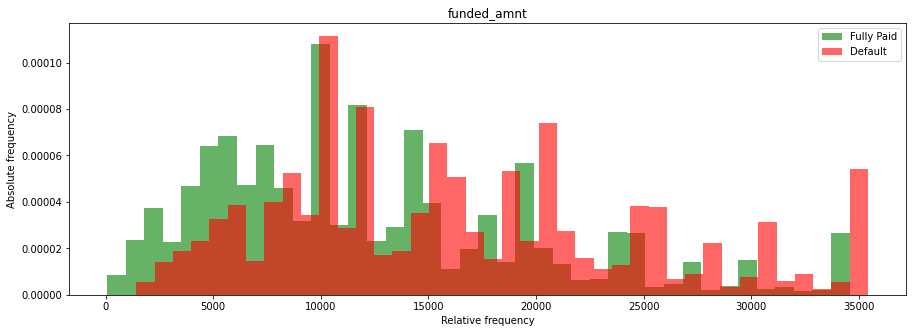

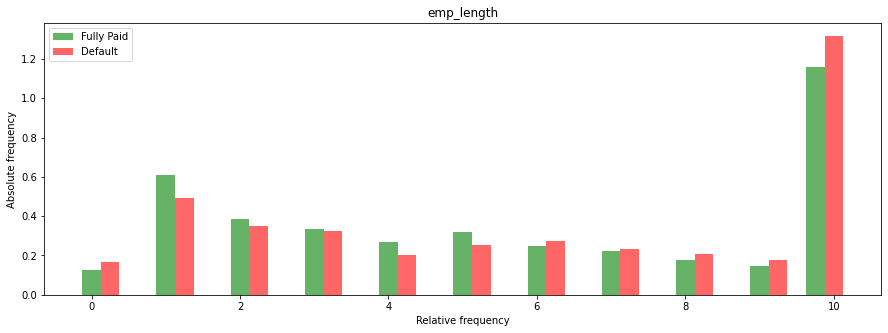

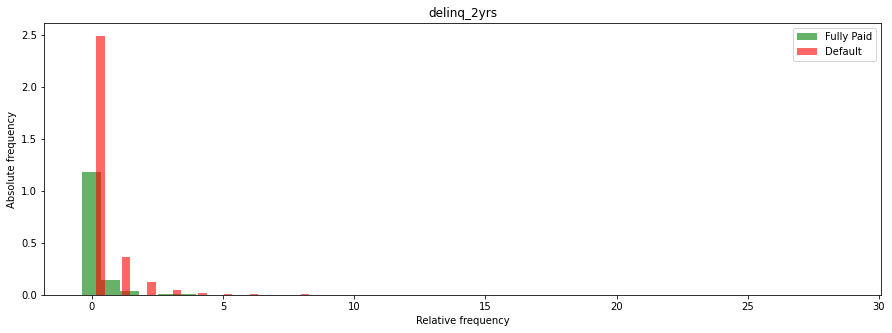

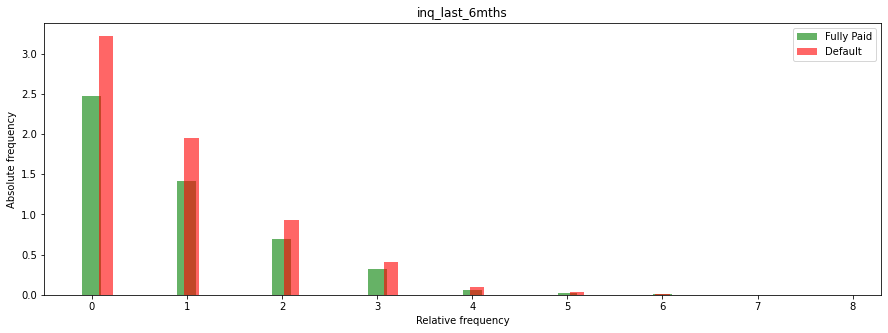

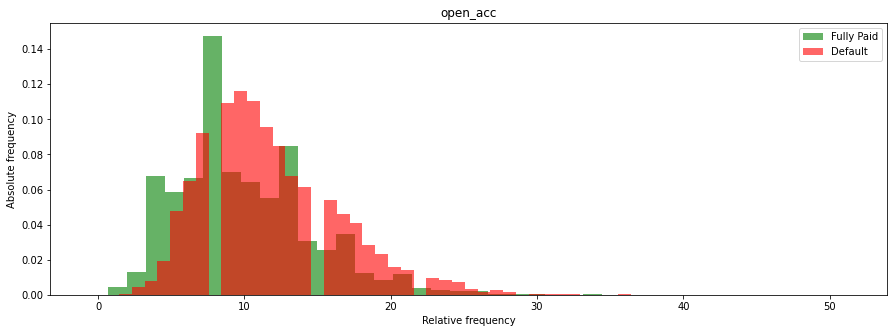

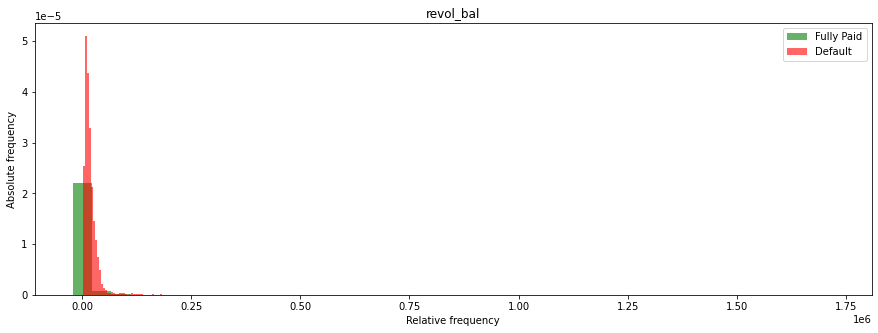

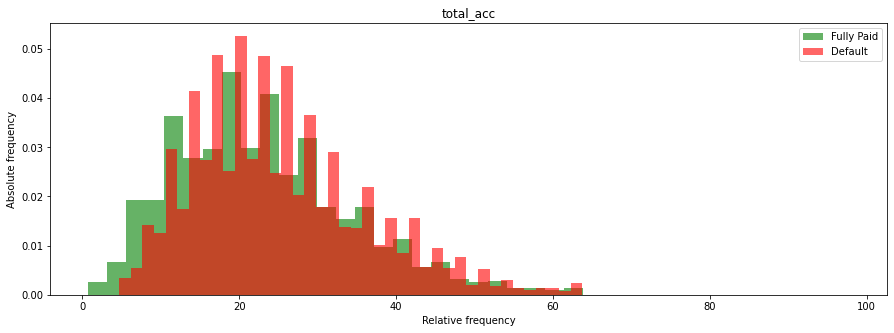

In [32]:
plt.rcParams['figure.figsize'] = [15, 5]
for col in clean_df.select_dtypes(include=["int64"]).columns:
      target(col)
    

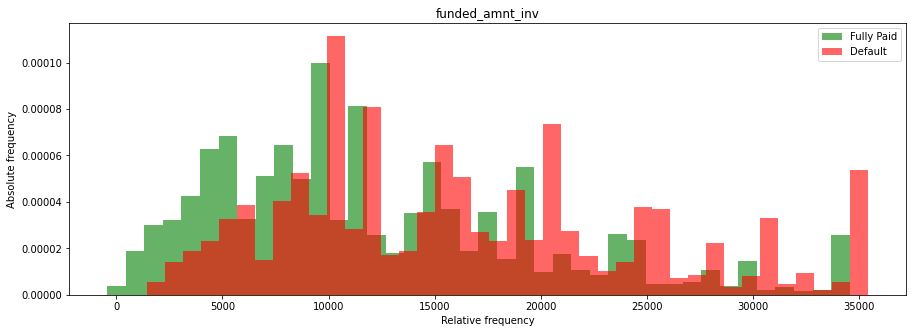

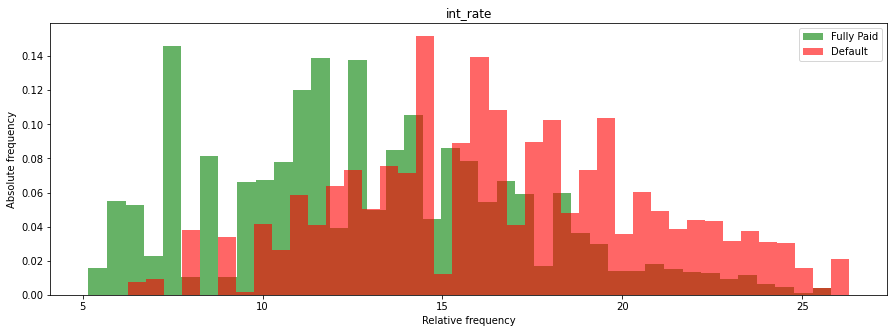

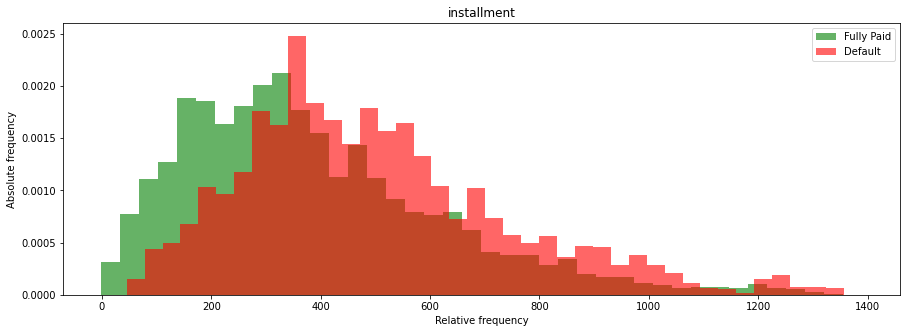

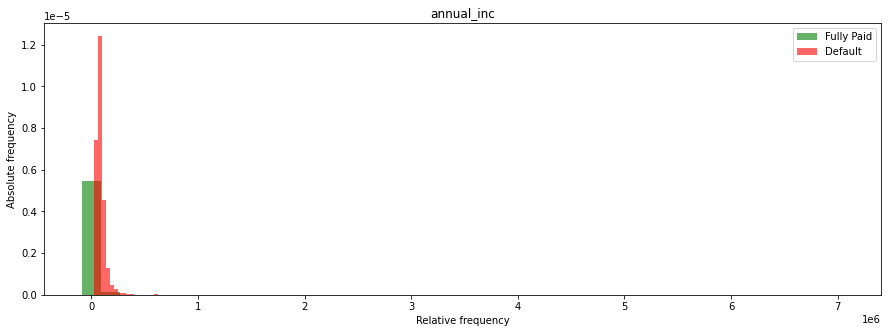

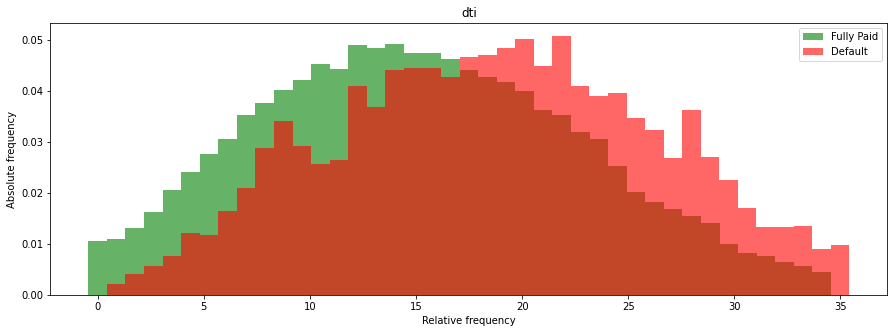

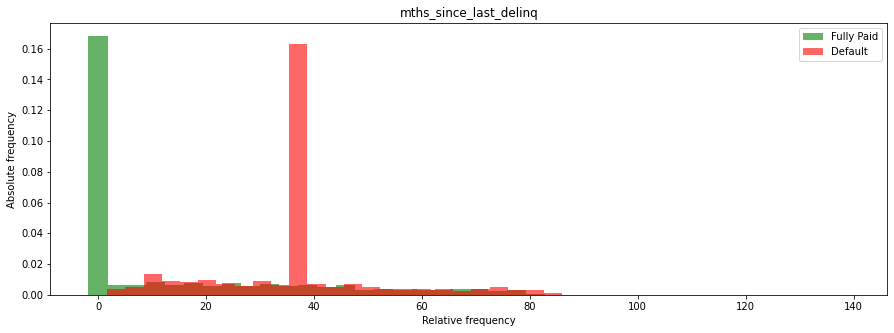

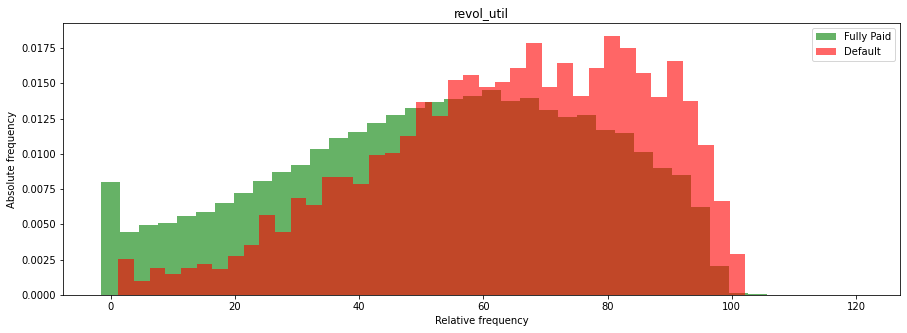

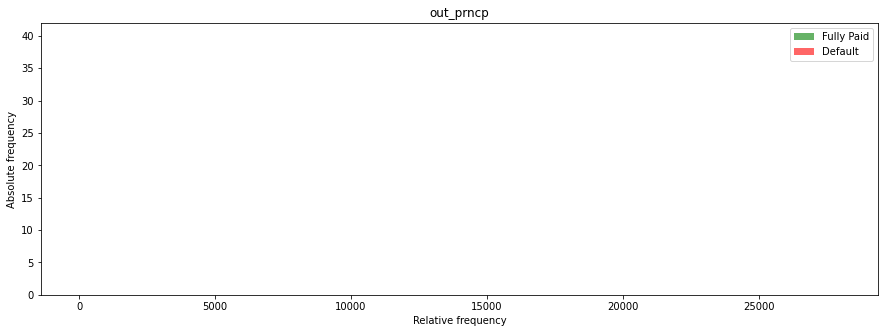

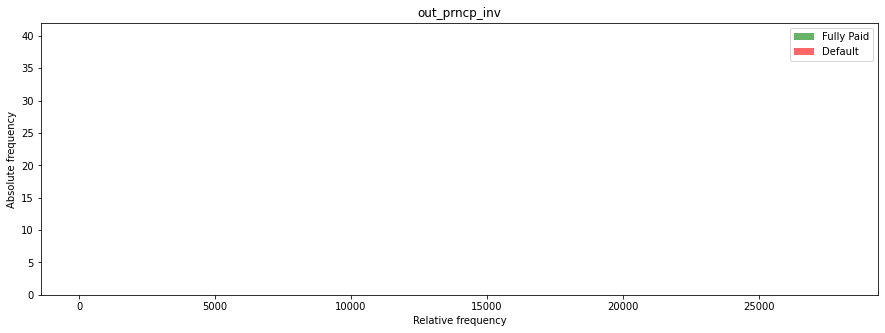

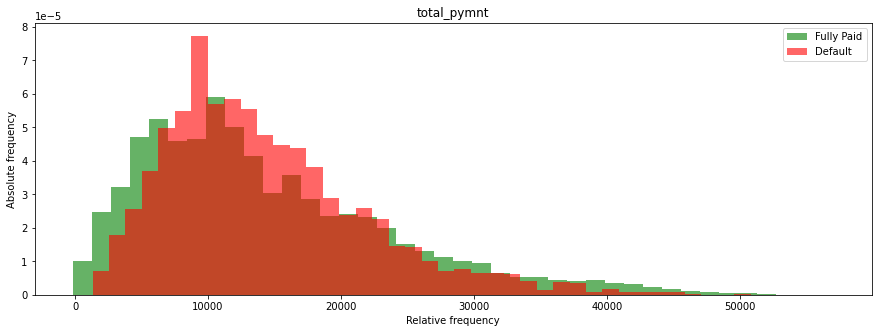

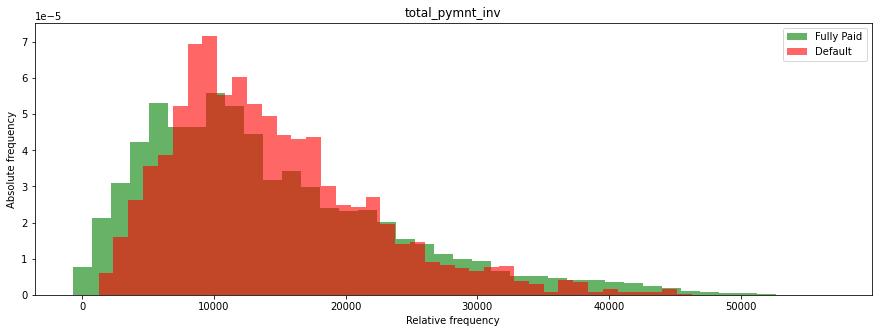

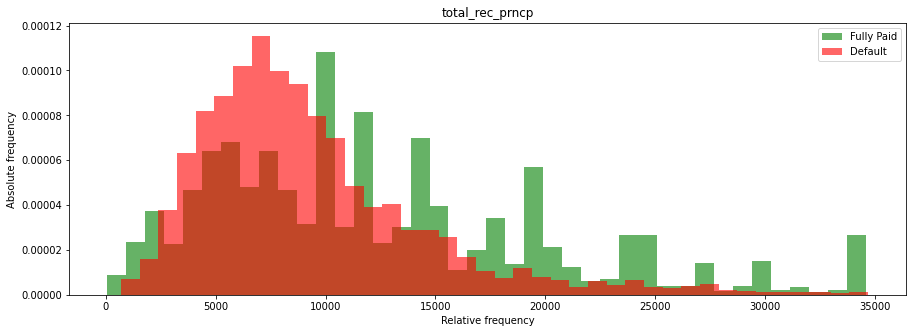

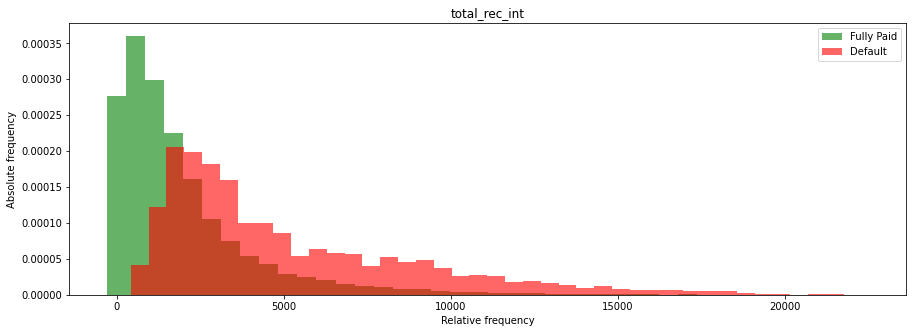

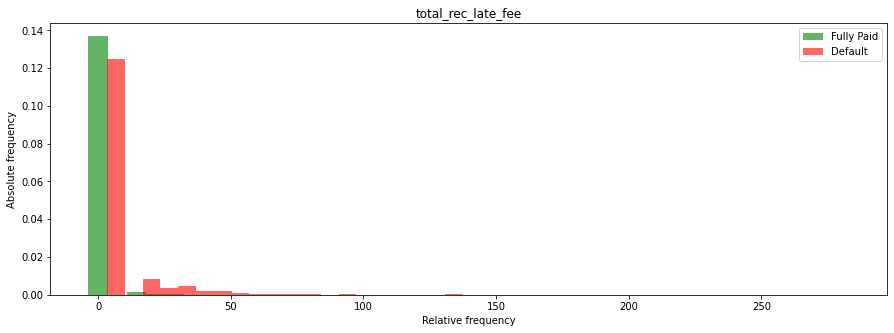

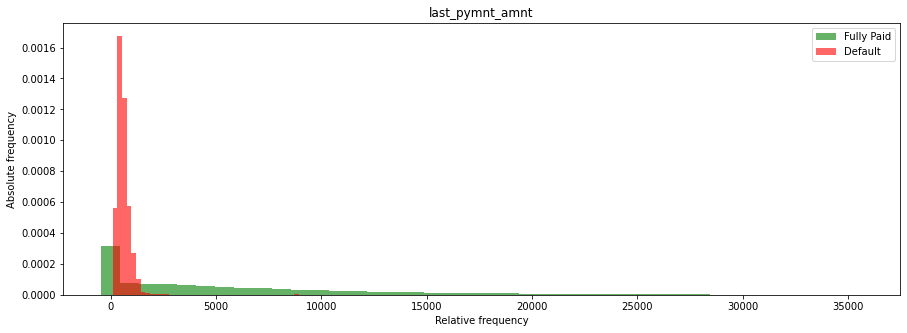

In [33]:
plt.rcParams['figure.figsize'] = [15, 5]
for col in clean_df.select_dtypes(include=["float64"]).columns:
      target(col)

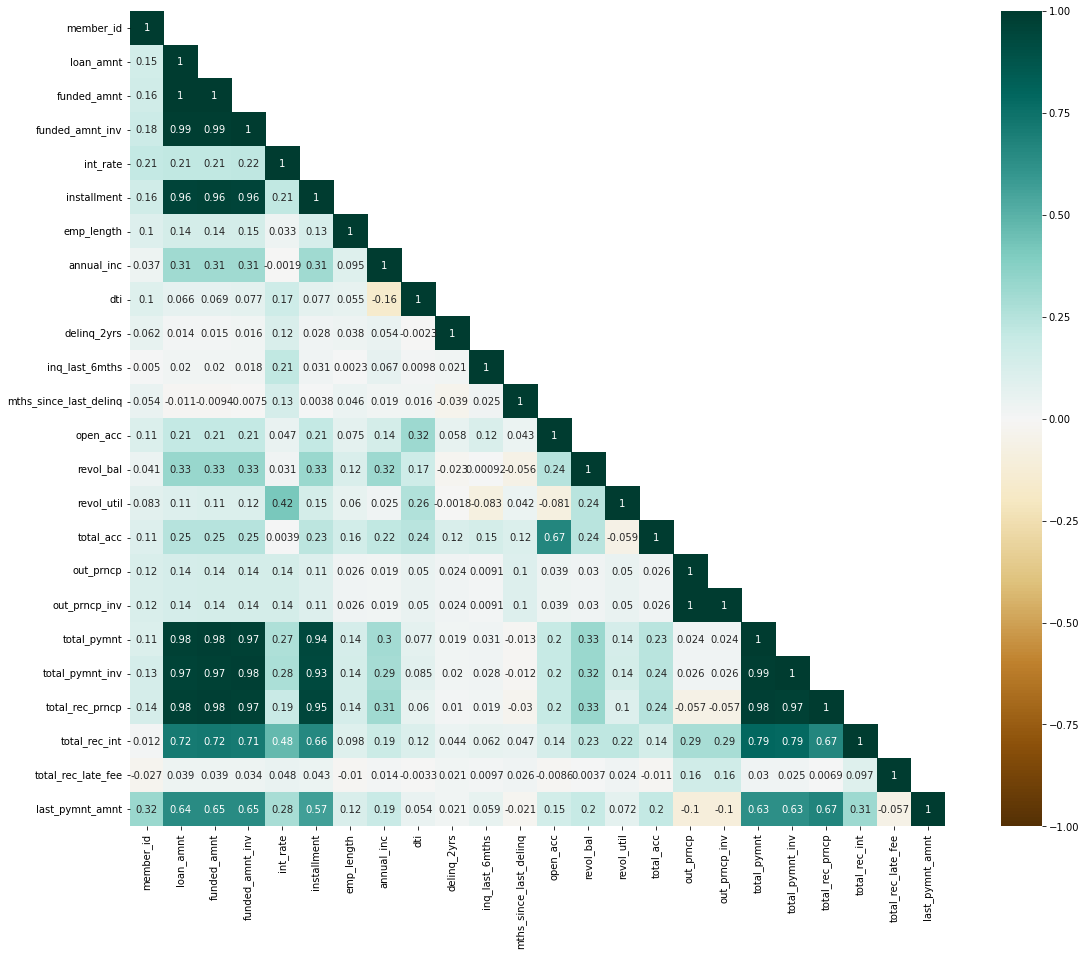

In [34]:
mask = np.triu(clean_df.corr(), 1)
plt.figure(figsize=(20, 15))
sns.heatmap(clean_df.corr(), annot=True, vmax=1, vmin=-1, square=True, cmap='BrBG', mask=mask);

In [35]:
Exp_Df = clean_df.copy()
Exp_Df.loc[(Exp_Df.loan_status == 'Fully Paid'),'loan_status']=0
Exp_Df.loc[(Exp_Df.loan_status == 'Default'),'loan_status']=1


In [36]:
Exp_Df['loan_status']= pd.to_numeric(Exp_Df['loan_status'])
Exp_Df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119137 entries, 0 to 119144
Data columns (total 36 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   member_id               119137 non-null  int64         
 1   loan_amnt               119137 non-null  int64         
 2   funded_amnt             119137 non-null  int64         
 3   funded_amnt_inv         119137 non-null  float64       
 4   term                    119137 non-null  object        
 5   int_rate                119137 non-null  float64       
 6   installment             119137 non-null  float64       
 7   grade                   119137 non-null  object        
 8   emp_length              119137 non-null  int64         
 9   home_ownership          119137 non-null  object        
 10  annual_inc              119137 non-null  float64       
 11  verification_status     119137 non-null  object        
 12  issue_d                 119137

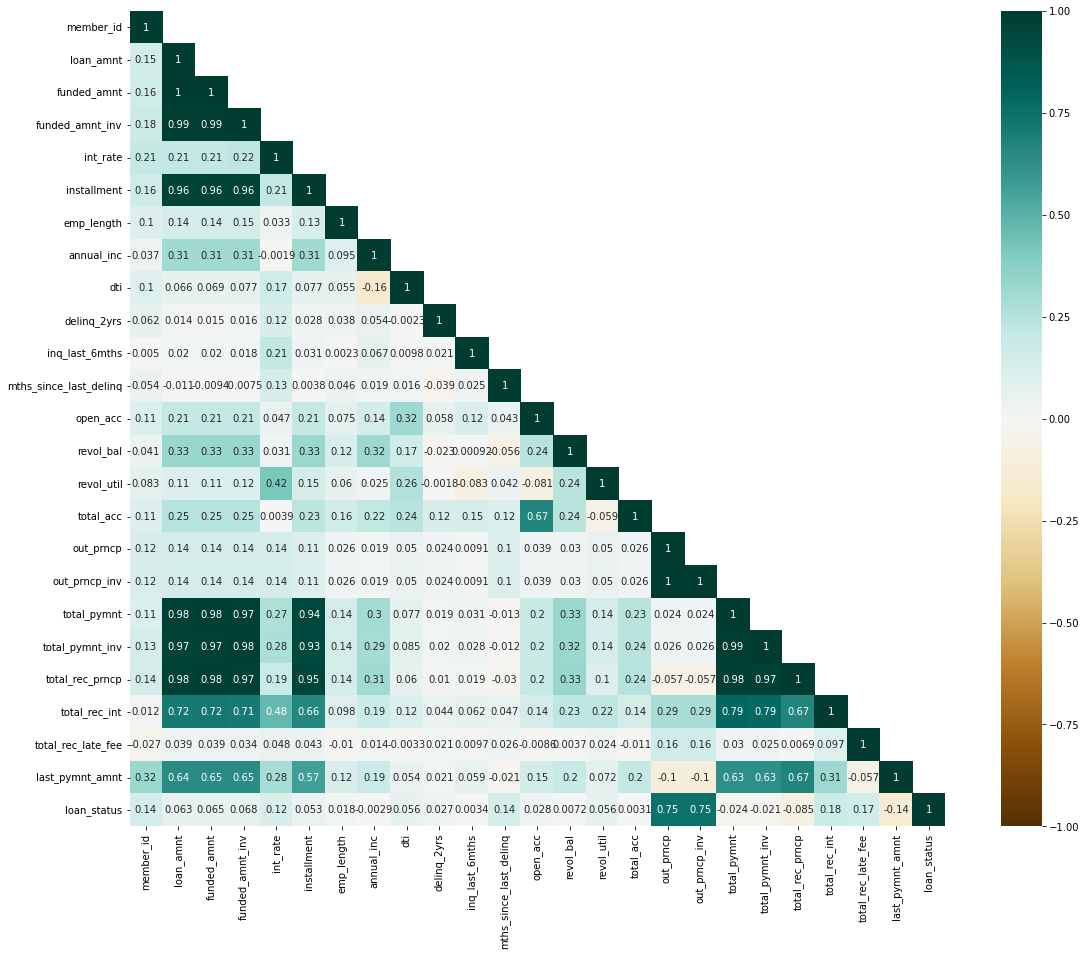

In [37]:
mask = np.triu(Exp_Df.corr(), 1)
plt.figure(figsize=(20, 15))
sns.heatmap(Exp_Df.corr(), annot=True, vmax=1, vmin=-1, square=True, cmap='BrBG', mask=mask);

In [38]:
bad_loan_c = pg.pairwise_corr(Exp_Df, columns=['loan_status'], method='pearson').loc[:,['X','Y','r']]
bad_loan_c.sort_values(by=['r'], ascending=False)

,X,Y,r
16,loan_status,out_prncp,0.750398
17,loan_status,out_prncp_inv,0.750319
21,loan_status,total_rec_int,0.184268
22,loan_status,total_rec_late_fee,0.169264
11,loan_status,mths_since_last_delinq,0.140701
0,loan_status,member_id,0.138127
4,loan_status,int_rate,0.120109
3,loan_status,funded_amnt_inv,0.067570
2,loan_status,funded_amnt,0.064925
1,loan_status,loan_amnt,0.063309


In [39]:
data_spear = Exp_Df.copy()
data_spear.drop(["loan_status"], axis=1, inplace=True)

spearman_rank = pg.pairwise_corr(data_spear, method='spearman').loc[:,['X','Y','r']]
pos = spearman_rank.sort_values(kind="quicksort", by=['r'], ascending=False).iloc[:5,:]
neg = spearman_rank.sort_values(kind="quicksort", by=['r'], ascending=False).iloc[-5:,:]
con = pd.concat([pos,neg], axis=0)
display(con.reset_index(drop=True))

,X,Y,r
0,out_prncp,out_prncp_inv,1.000000
1,loan_amnt,funded_amnt,0.996830
2,total_pymnt,total_pymnt_inv,0.988162
3,funded_amnt,funded_amnt_inv,0.988143
4,funded_amnt_inv,total_pymnt_inv,0.988125
5,open_acc,revol_util,-0.091788
6,total_rec_late_fee,last_pymnt_amnt,-0.110401
7,out_prncp,last_pymnt_amnt,-0.170939
8,out_prncp_inv,last_pymnt_amnt,-0.170939
9,annual_inc,dti,-0.174887


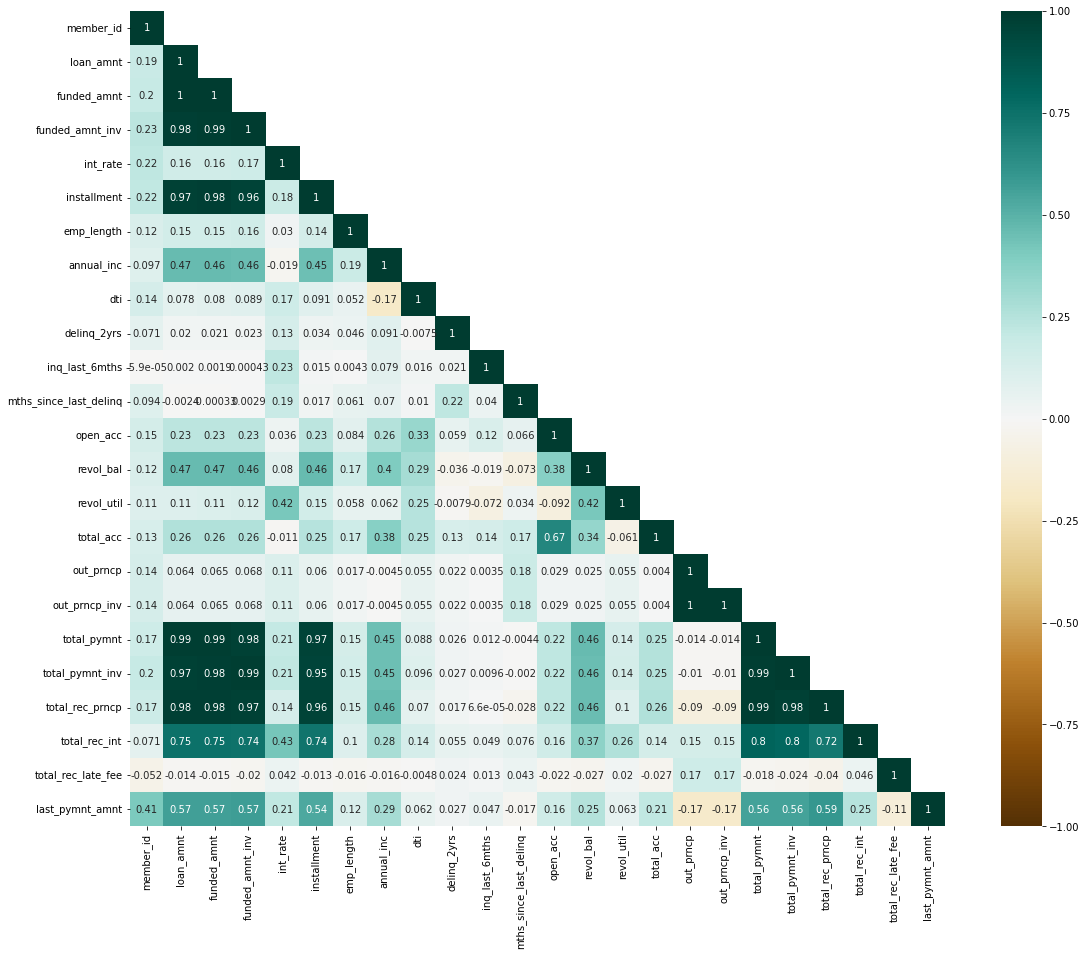

In [40]:
mask = np.triu(data_spear.corr(method='spearman'), 1)
plt.figure(figsize=(20, 15))
sns.heatmap(data_spear.corr(method='spearman'), annot=True, vmax=1, vmin=-1, square=True, cmap='BrBG', mask=mask);